In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

%matplotlib inline

# Increasing numNodes

## Total Cost

In [2]:
def fill_dataFrame_total(path, files):
    df_time = pd.DataFrame()
    df_prec = pd.DataFrame()
    df_conv = pd.DataFrame()
    for file in files:
        with open(os.path.join(path,file)) as f:
            col = file.split('.')[0]
            for line in f:
                vals = line.split(' ')
                row = vals[0]+','+vals[1]+','+vals[2]
                df_time.loc[row,col] = float(vals[3])
                df_prec.loc[row,col] = int(vals[4])
                df_conv.loc[row,col] = int(vals[5])==1
    return df_time,df_prec,df_conv

### Sequential

In [3]:
path = "../results/total/sequential"
files = sorted(os.listdir(path))

In [4]:
df_seq_time,df_seq_prec,df_seq_conv = fill_dataFrame_total(path,files)

In [5]:
df_seq_time

,0
"10,10000,5000",0.074393
"50,10000,5000",0.677360
"100,10000,5000",1.790241


In [6]:
df_seq_prec

,0
"10,10000,5000",204.0
"50,10000,5000",1145.0
"100,10000,5000",2311.0


In [7]:
df_seq_conv

,0
"10,10000,5000",True
"50,10000,5000",True
"100,10000,5000",True


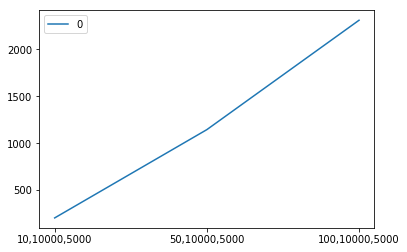

In [8]:
plt.plot(df_seq_prec);
plt.legend(df_seq_prec.columns);

### Parallel

In [9]:
path = "../results/total/parallel"
files = sorted(os.listdir(path))

In [10]:
df_par_time,df_par_prec,df_par_conv = fill_dataFrame_total(path,files)

In [11]:
df_par_time

,0
"10,10000,5000",0.124000
"50,10000,5000",0.322184
"100,10000,5000",0.633308


In [12]:
df_par_prec

,0
"10,10000,5000",204.0
"50,10000,5000",992.0
"100,10000,5000",2788.0


In [13]:
df_par_conv

,0
"10,10000,5000",True
"50,10000,5000",True
"100,10000,5000",True


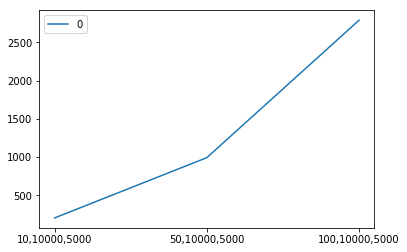

In [14]:
plt.plot(df_par_prec);
plt.legend(df_par_prec.columns);

### Parallel MPI

In [15]:
path = "../results/total/parallelMPI"
files = sorted(os.listdir(path))

In [16]:
df_mpi_time,df_mpi_prec,df_mpi_conv = fill_dataFrame_total(path,files)

In [17]:
df_mpi_time

,0,1,2,3
"10,10000,5000",0.565341,0.550870,0.546755,0.536641
"50,10000,5000",1.362287,1.374145,1.350046,1.344589
"100,10000,5000",2.882608,2.859286,2.906264,2.896500


In [18]:
df_mpi_prec

,0,1,2,3
"10,10000,5000",204.0,204.0,204.0,204.0
"50,10000,5000",1014.0,958.0,968.0,1008.0
"100,10000,5000",2221.0,2078.0,2221.0,2221.0


In [19]:
df_mpi_conv

,0,1,2,3
"10,10000,5000",True,True,True,True
"50,10000,5000",True,True,True,True
"100,10000,5000",True,True,True,True


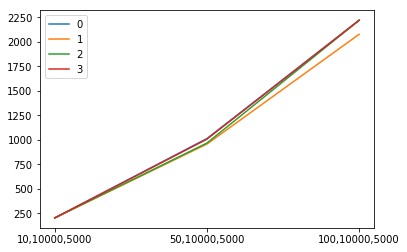

In [21]:
plt.plot(df_mpi_prec);
plt.legend(df_mpi_prec.columns);

## Detailed Cost

In [22]:
def fill_dataFrame_detailed(path, files):
    df = pd.DataFrame()
    for file in files:
        with open(os.path.join(path,file)) as f:
            col = file.split('.')[0]
            for line in f:
                vals = line.split(' ')
                row = vals[0]+','+vals[1]+','+vals[2]
                try:
                    df.loc[row,col] += ' '+vals[3][:-1]
                except KeyError:
                    df.loc[row,col] = vals[3][:-1]
                except TypeError:
                    df.loc[row,col] = vals[3][:-1]
    return df

### Sequential

In [23]:
path = "../results/detailed/sequential"
genFiles = sorted([i for i in os.listdir(path) if "generation" in i])
pathFiles = sorted([i for i in os.listdir(path) if "path" in i])
rearrFiles = sorted([i for i in os.listdir(path) if "rearrange" in i])
sortFiles = sorted([i for i in os.listdir(path) if "sort" in i])

In [24]:
df_gen = fill_dataFrame_detailed(path,genFiles)
df_gen

,generation_0
"10,10000,5000",0.002105 0.002055 0.002043 0.002043 0.002043 0...
"50,10000,5000",0.015063 0.014828 0.014824 0.014818 0.014810 0...
"100,10000,5000",0.033577 0.033281 0.033297 0.033300 0.033285 0...


In [25]:
len(df_gen.iloc[0,0].split(' '))

28

In [26]:
df_path = fill_dataFrame_detailed(path,pathFiles)
df_path

,path_0
"10,10000,5000",0.000170 0.000147 0.000147 0.000147 0.000147 0...
"50,10000,5000",0.000721 0.000696 0.000694 0.000694 0.000695 0...
"100,10000,5000",0.001403 0.001365 0.001362 0.001362 0.001364 0...


In [27]:
len(df_path.iloc[0,0].split(' '))

29

In [28]:
df_rearr = fill_dataFrame_detailed(path, rearrFiles)
df_rearr

,rearrange_0
"10,10000,5000",0.000060 0.000030 0.000030 0.000029 0.000029 0...
"50,10000,5000",0.000268 0.000105 0.000104 0.000103 0.000102 0...
"100,10000,5000",0.000332 0.000161 0.000161 0.000157 0.000156 0...


In [29]:
len(df_rearr.iloc[0,0].split(' '))

29

In [30]:
df_sort = fill_dataFrame_detailed(path, sortFiles)
df_sort

,sort_0
"10,10000,5000",0.000723 0.000506 0.000495 0.000494 0.000493 0...
"50,10000,5000",0.000751 0.000526 0.000512 0.000510 0.000507 0...
"100,10000,5000",0.000754 0.000528 0.000514 0.000514 0.000510 0...


In [31]:
len(df_sort.iloc[0,0].split(' '))

29

### Parallel

In [32]:
path = "../results/detailed/parallel"
genFiles = sorted([i for i in os.listdir(path) if "generation" in i])
pathFiles = sorted([i for i in os.listdir(path) if "path" in i])
rearrFiles = sorted([i for i in os.listdir(path) if "rearrange" in i])
sortFiles = sorted([i for i in os.listdir(path) if "sort" in i])

In [33]:
df_gen = fill_dataFrame_detailed(path,genFiles)
df_gen

,generation_0
"10,10000,5000",0.004018 0.004053 0.004005 0.003981 0.004031 0...
"50,10000,5000",0.006249 0.006218 0.006205 0.006232 0.006235 0...
"100,10000,5000",0.011708 0.012038 0.012073 0.012316 0.011639 0...


In [34]:
len(df_gen.iloc[0,0].split(' '))

28

In [35]:
df_path = fill_dataFrame_detailed(path, pathFiles)
df_path

,path_0
"10,10000,5000",0.000102 0.000040 0.000036 0.000035 0.000035 0...
"50,10000,5000",0.000242 0.000177 0.000177 0.000179 0.000177 0...
"100,10000,5000",0.000419 0.000347 0.000348 0.000350 0.000348 0...


In [36]:
len(df_path.iloc[0,0].split(' '))

29

In [37]:
df_rearr = fill_dataFrame_detailed(path, rearrFiles)
df_rearr

,rearrange_0
"10,10000,5000",0.000062 0.000036 0.000043 0.000041 0.000038 0...
"50,10000,5000",0.000273 0.000129 0.000157 0.000156 0.000154 0...
"100,10000,5000",0.000442 0.000196 0.000223 0.000223 0.000222 0...


In [38]:
len(df_rearr.iloc[0,0].split(' '))

29

In [39]:
df_sort = fill_dataFrame_detailed(path, sortFiles)
df_sort

,sort_0
"10,10000,5000",0.000241 0.000220 0.000213 0.000210 0.000206 0...
"50,10000,5000",0.000247 0.000234 0.000232 0.000229 0.000225 0...
"100,10000,5000",0.000250 0.000239 0.000229 0.000237 0.000234 0...


In [40]:
len(df_sort.iloc[0,0].split(' '))

29

### Parallel MPI

In [41]:
path = "../results/detailed/parallelMPI"
genFiles = sorted([i for i in os.listdir(path) if "generation" in i])
pathFiles = sorted([i for i in os.listdir(path) if "path" in i])
rearrFiles = sorted([i for i in os.listdir(path) if "rearrange" in i])
sortFiles = sorted([i for i in os.listdir(path) if "sort" in i])
transFiles = sorted([i for i in os.listdir(path) if "transfer" in i])

In [42]:
df_gen = fill_dataFrame_detailed(path, genFiles)
df_gen

,generation_0,generation_1,generation_2,generation_3
"10,10000,5000",0.007053 0.007526 0.005232 0.003383 0.004779 0...,0.008255 0.005544 0.005941 0.005770 0.008236 0...,0.006735 0.004584 0.004717 0.003639 0.005411 0...,0.006262 0.007882 0.006173 0.009024 0.007306 0...
"50,10000,5000",0.012600 0.022974 0.013497 0.010573 0.010014 0...,0.016508 0.021330 0.012876 0.014394 0.016074 0...,0.017814 0.011150 0.014148 0.016168 0.011780 0...,0.017361 0.018787 0.015812 0.023027 0.017234 0...
"100,10000,5000",0.037245 0.024286 0.020791 0.025156 0.038369 0...,0.033297 0.022472 0.028880 0.025561 0.024995 0...,0.023367 0.034380 0.035428 0.030651 0.033487 0...,0.027510 0.033155 0.022000 0.036702 0.031645 0...


In [43]:
len(df_gen.iloc[0,0].split(' '))

36

In [44]:
df_path = fill_dataFrame_detailed(path, pathFiles)
df_path

,path_0,path_1,path_2,path_3
"10,10000,5000",0.004972 0.004894 0.006088 0.006777 0.002473 0...,0.004931 0.000199 0.002895 0.007867 0.003707 0...,0.006346 0.003388 0.000037 0.006919 0.003831 0...,0.003724 0.002075 0.004004 0.002443 0.003391 0...
"50,10000,5000",0.005309 0.010773 0.004900 0.007059 0.000177 0...,0.005397 0.007080 0.003539 0.006814 0.009266 0...,0.004049 0.000183 0.002760 0.002060 0.004056 0...,0.009454 0.005335 0.003605 0.002702 0.006265 0...
"100,10000,5000",0.005917 0.003117 0.004326 0.013634 0.004314 0...,0.013122 0.003346 0.004766 0.003312 0.003107 0...,0.005918 0.005269 0.008686 0.005847 0.005259 0...,0.007102 0.004233 0.004303 0.005253 0.002298 0...


In [45]:
len(df_path.iloc[0,0].split(' '))

37

In [46]:
df_rearr = fill_dataFrame_detailed(path, rearrFiles)
df_rearr

,rearrange_0,rearrange_1,rearrange_2,rearrange_3
"10,10000,5000",0.000066 0.000044 0.000044 0.000044 0.000042 0...,0.000067 0.000036 0.000043 0.000042 0.000041 0...,0.000072 0.000041 0.000044 0.000044 0.000044 0...,0.000064 0.000043 0.000044 0.000043 0.000042 0...
"50,10000,5000",0.000319 0.000146 0.000167 0.000166 0.000154 0...,0.000278 0.000155 0.000154 0.001303 0.000149 0...,0.000286 0.000123 0.000160 0.000162 0.000158 0...,0.000323 0.000153 0.000158 0.000148 0.000164 0...
"100,10000,5000",0.000658 0.000241 0.009661 0.000306 0.000286 0...,0.000696 0.000291 0.000284 0.000269 0.000256 0...,0.000624 0.000255 0.000263 0.000263 0.000291 0...,0.000633 0.000246 0.000278 0.000242 0.000257 0...


In [47]:
len(df_rearr.iloc[0,0].split(' '))

37

In [48]:
df_sort = fill_dataFrame_detailed(path, sortFiles)
df_sort

,sort_0,sort_1,sort_2,sort_3
"10,10000,5000",0.009641 0.004757 0.005293 0.002776 0.002744 0...,0.013642 0.000220 0.003933 0.007606 0.007672 0...,0.002941 0.002455 0.000218 0.006961 0.002752 0...,0.002442 0.002756 0.002037 0.002722 0.003611 0...
"50,10000,5000",0.007291 0.005146 0.009411 0.006697 0.000224 0...,0.002797 0.004404 0.005929 0.006700 0.002662 0...,0.005070 0.000235 0.002705 0.002477 0.008002 0...,0.005205 0.006510 0.004258 0.002678 0.008347 0...
"100,10000,5000",0.010371 0.000242 0.004284 0.006166 0.009080 0...,0.008062 0.007645 0.013458 0.002711 0.004090 0...,0.002585 0.005633 0.002706 0.007304 0.011818 0...,0.005201 0.003983 0.004479 0.003933 0.002794 0...


In [49]:
len(df_sort.iloc[0,0].split(' '))

37

In [50]:
df_trans = fill_dataFrame_detailed(path, transFiles)
df_trans

,transfer_0,transfer_1,transfer_2,transfer_3
"10,10000,5000",0.046671 0.007166 0.000005 0.015929 0.020588 0...,0.000028 0.000006 0.007380 0.008683 0.005930 0...,0.040292 0.008603 0.005502 0.010127 0.010032 0...,0.022503 0.018761 0.009833 0.000006 0.000006 0...
"50,10000,5000",0.004131 0.015372 0.012382 0.002404 0.099636 0...,0.002990 0.000010 0.000009 0.000009 0.120187 0...,0.065806 0.058796 0.031799 0.009294 0.000013 0...,0.000038 0.018597 0.034477 0.007989 0.109115 0...
"100,10000,5000",0.008905 0.027162 0.173401 0.000010 0.199960 0...,0.005770 0.042246 0.225737 0.041830 0.000017 0...,0.000038 0.000012 0.032988 0.012171 0.214613 0...,0.059023 0.030166 0.000016 0.249314 0.003004 0...


In [51]:
len(df_trans.iloc[0,0].split(' '))

9